In [1]:
import tensorflow as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

sns.set()

In [2]:
df = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv").astype('float32')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.rename(columns={'0':'label'}, inplace=True)
X = df.drop('label', axis = 1)
y = df['label']

print(X.shape)
X.head()

(372450, 784)


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


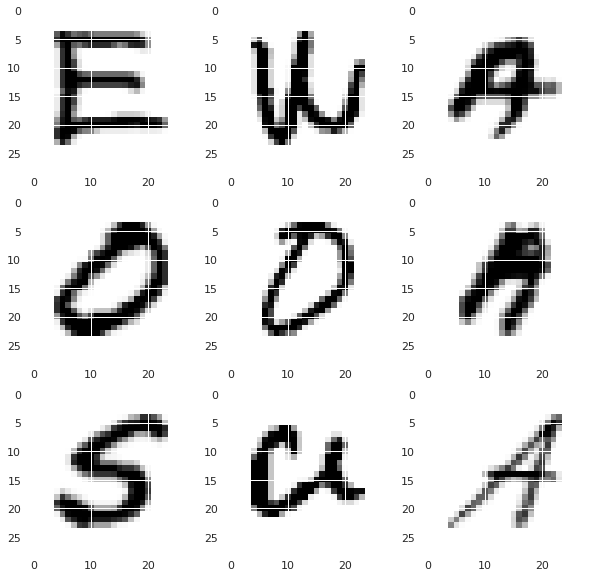

In [4]:
from sklearn.utils import shuffle
X_Shuffled = shuffle(X)

plt.figure(figsize = (10, 10))
rows, columns = 3, 3

for i in range(9):
    plt.subplot(columns, rows, i+1)
    plt.imshow(X_Shuffled.iloc[i].values.reshape(28,28), interpolation='nearest', cmap='Greys')
    
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label'>

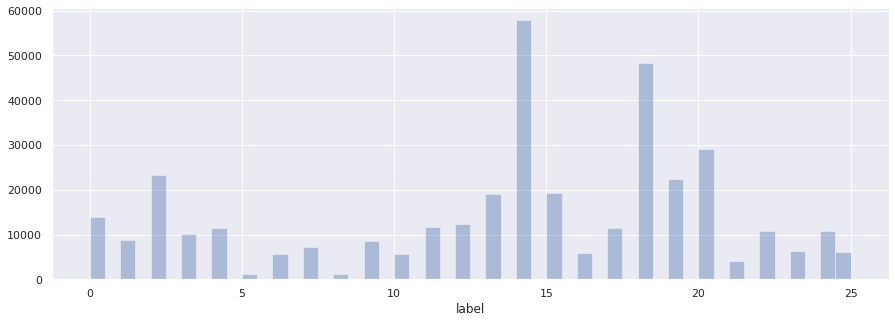

In [5]:
alphabets="abcdefghijklmnopqrstuvwxyz"
letter_name=[]
[letter_name.append(i) for i in alphabets]
name_tag = pd.DataFrame(letter_name)

plt.figure(figsize=(15,5))
sns.distplot(y,kde=False)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((297960, 784), (74490, 784), (297960,), (74490,))

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
alphabets="abcdefghijklmnopqrstuvwxyz"
letter_name=[]
[letter_name.append(i) for i in alphabets]
name_tag = pd.DataFrame(letter_name)

name_tag

,0
0,a
1,b
2,c
3,d
4,e
5,f
6,g
7,h
8,i
9,j


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

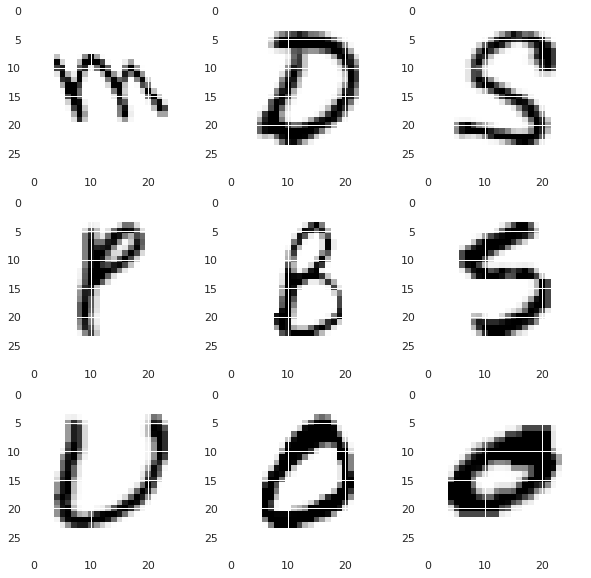

In [10]:
X_Shuffled = shuffle(X)

plt.figure(figsize = (10, 10))
rows, columns = 3, 3

for i in range(9):
    plt.subplot(columns, rows, i+1)
    plt.imshow(X_Shuffled.iloc[i].values.reshape(28,28), interpolation='nearest', cmap='Greys')
    
plt.show()

In [11]:
from keras.utils import np_utils
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=16, batch_size=200, verbose=2)

2022-08-24 13:28:55.835432: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-24 13:28:58.392361: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/16
1304/1304 - 44s - loss: 0.2469 - accuracy: 0.9313 - val_loss: 0.1011 - val_accuracy: 0.9723
Epoch 2/16
1304/1304 - 41s - loss: 0.0934 - accuracy: 0.9735 - val_loss: 0.0709 - val_accuracy: 0.9807
Epoch 3/16
1304/1304 - 40s - loss: 0.0702 - accuracy: 0.9797 - val_loss: 0.0599 - val_accuracy: 0.9844
Epoch 4/16
1304/1304 - 41s - loss: 0.0574 - accuracy: 0.9834 - val_loss: 0.0568 - val_accuracy: 0.9853
Epoch 5/16
1304/1304 - 42s - loss: 0.0488 - accuracy: 0.9859 - val_loss: 0.0509 - val_accuracy: 0.9872
Epoch 6/16
1304/1304 - 41s - loss: 0.0410 - accuracy: 0.9877 - val_loss: 0.0495 - val_accuracy: 0.9884
Epoch 7/16
1304/1304 - 43s - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0468 - val_accuracy: 0.9897
Epoch 8/16
1304/1304 - 43s - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0457 - val_accuracy: 0.9906
Epoch 9/16
1304/1304 - 41s - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0464 - val_accuracy: 0.9913
Epoch 10/16
1304/1304 - 42s - loss: 0.0236 - accuracy: 0.9923 - val_loss:

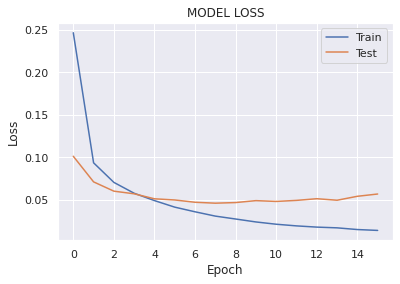

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

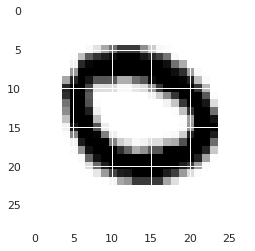

In [14]:
plt.imshow(X_test[[18]].reshape(28,28),cmap='Greys')

In [15]:
prediction = model.predict(X_test[[18]]) 
print(prediction)
score = np.argmax(prediction)
score = prediction[0,score]
score = round((score*100), 4)

score

[[2.5228219e-20 2.9556418e-14 4.9993020e-08 3.7788124e-09 1.4671744e-16
  1.2994424e-24 7.6752617e-14 5.3389696e-24 1.9208911e-24 1.5955012e-11
  4.1842957e-24 5.6724523e-24 7.4366131e-24 2.0489490e-15 9.9999988e-01
  9.5845172e-11 6.4570888e-12 2.4163650e-20 2.2961581e-08 5.3057503e-14
  1.0114941e-08 3.9559380e-29 9.5811012e-22 8.8626452e-25 1.8271196e-12
  7.6675714e-20]]


100.0

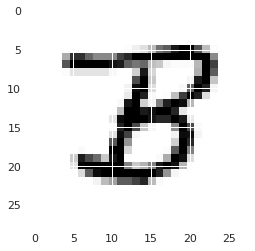

In [16]:
plt.imshow(X_test[[19]].reshape(28,28),cmap='Greys')

In [17]:
prediction = model.predict(X_test[[19]]) 
print(prediction)
score = np.argmax(prediction)
score = prediction[0,score]
score = round((score*100), 4)

score

[[9.1127975e-28 1.0000000e+00 1.8920671e-20 2.2039845e-17 3.7315970e-17
  7.9430042e-24 8.1356898e-14 2.1531900e-19 3.8130370e-20 3.2518839e-13
  4.9785638e-21 1.2574125e-25 9.8517910e-33 7.0266735e-25 5.8737563e-19
  7.1614142e-16 6.5874258e-22 4.6209004e-16 2.0137053e-14 5.4757127e-20
  6.5274355e-16 1.9155355e-31 3.2560955e-26 2.3611785e-16 1.2262437e-17
  5.5116100e-13]]


100.0

In [18]:
def result(pred):
    alphabets="abcdefghijklmnopqrstuvwxyz"
    list1=[]
    [list1.append(i) for i in range(26)]
    list2=[]
    [list2.append(i) for i in alphabets]
    dic = dict(zip(list1, list2))
    score = np.argmax(pred)
    score = pred[0,score]
    score = round((score*100), 4)

    print("Prediction: ",dic[np.argmax(pred)], "Score: ", score)


In [19]:
result(prediction)

Prediction:  b Score:  100.0


In [20]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [21]:
pip install imutils

  Preparing metadata (setup.py) ... - done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=e5c0db6a3e1d3a99613415481aa26c5a03ea959dfb0b7a89e517421d75cd9700
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [22]:
import imutils
import cv2
import numpy as np
def final(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.show()
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    for c in cnts:

        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (28, 28), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,28,28,1)
        ypred = model.predict(thresh)

        result(ypred)

    plt.imshow(image)

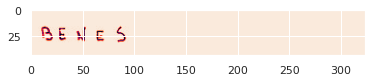

Prediction:  b Score:  100.0
Prediction:  e Score:  99.9984
Prediction:  v Score:  59.1225
Prediction:  e Score:  100.0
Prediction:  s Score:  100.0


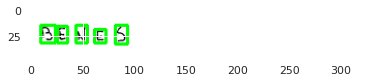

In [23]:
final('../input/samplesss/test_0001.jpg')